In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("simulation.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([18061]), array([74]))
-0.0003541480454727043


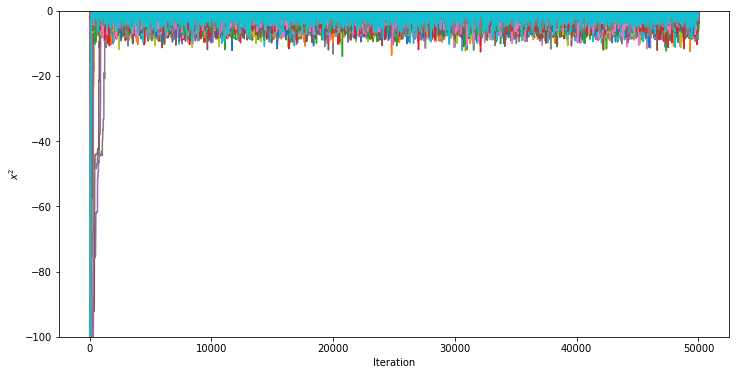

In [5]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

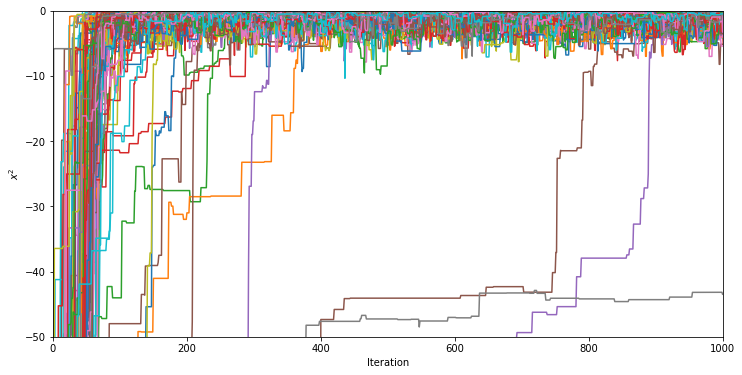

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [7]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([18128., 17833., 17238., 17777., 17679., 18020., 17577.,  5253.,
        5537., 17983., 17837., 17635., 17469., 17819., 17374., 17468.,
       17784., 17222., 18154.,  4750., 17520., 17726., 17669., 17477.,
        5415., 17167., 17930., 17500., 17627., 18018., 17921., 17650.,
       17730., 17382.,  5525., 18135., 17664., 18024., 17188., 17771.,
       17659., 17817.,  5412., 17809., 18103.,  5345.,  5488., 17605.,
       17932., 18150., 17586., 17818.,  5469., 17224., 17271., 17929.,
       17441.,   594., 17443.,  5317., 17294., 17678., 17493., 17662.,
        5621., 17639., 17040., 17245.,  5439., 17891., 17487., 17666.,
       17669., 17769., 17593., 17248., 17453.,  5555., 17505., 17862.,
        5425., 17667., 17803., 17321., 17861., 17641.,  5358.,  5469.,
       17709.,  5318., 17375., 17396.,  5541., 17860.,  5095.,  5429.,
       17908., 17275., 17379., 17922., 17750.,  5523., 18022., 18155.,
        5383., 17953., 17869.,  5120.,  5458., 17316., 17645.,  5278.,
      

[505.78283522 173.14189141 285.93862655 317.91714542]
flat chain shape: (4800, 4)
flat log prob shape: (4800,)


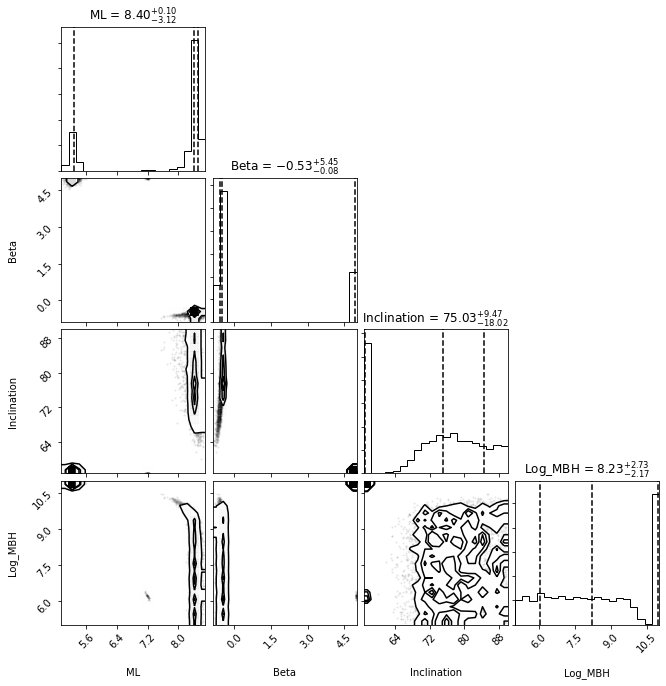

In [19]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=10000, flat=True, thin=1000)
log_prob_samples = read.get_log_prob(discard=10000,flat=True, thin=1000)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

1011 252


flat chain shape: (23280, 4)
flat log prob shape: (23280,)


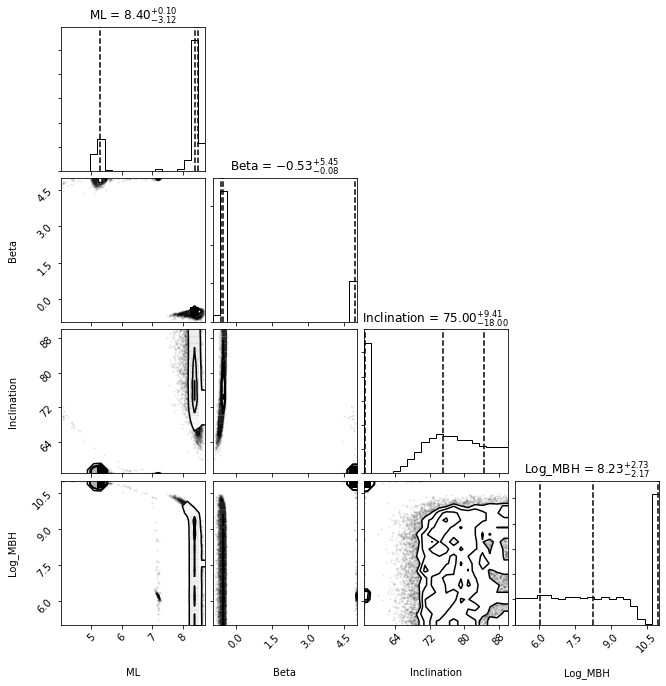

In [9]:
#Corner plots
tau = read.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [10]:
from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
tau = read.get_autocorr_time()
tau

array([505.78283522, 173.14189141, 285.93862655, 317.91714542])

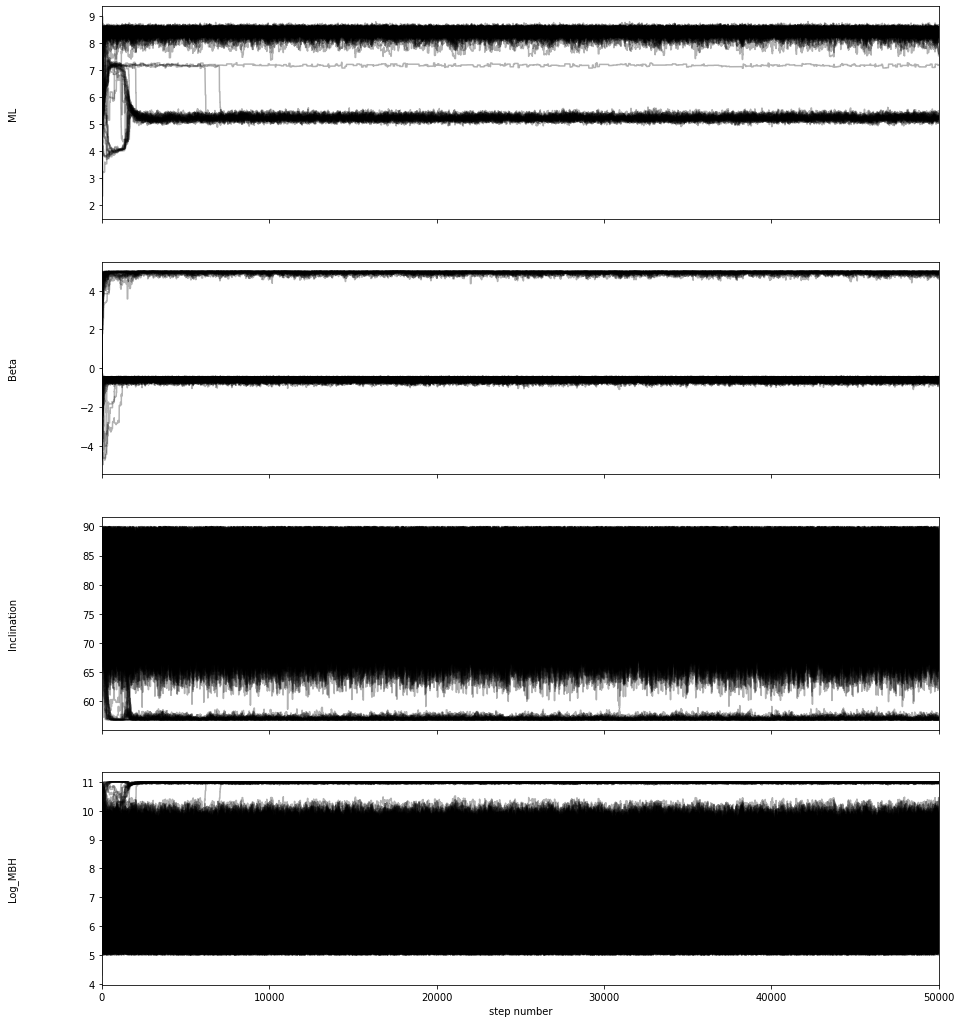

In [12]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [13]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

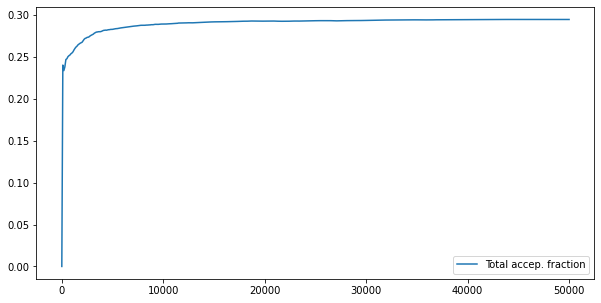

In [14]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

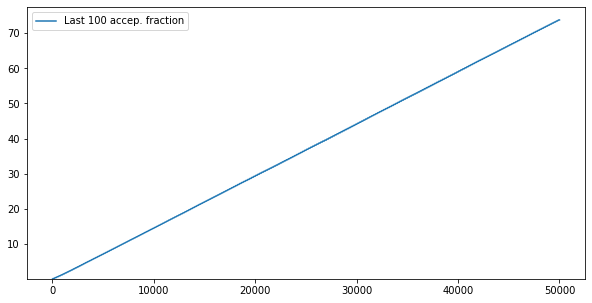

In [15]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()